In [ ]:
import numpy as np
import pandas
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

def linear_function(x):
    return x

def linear_derivative(x):
    return 1

def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x)**2

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x >= 0, 1, 0)

def MSE(errors):
    return np.mean(np.square(errors))

def activation_derivative(self, x):
    return sigmoid(x) * (1 - sigmoid(x))

def initialize_weights_he(output_size,input_size):
    limit = np.sqrt(2/input_size)
    weights = np.random.uniform(low=-limit,high=limit,size=(output_size,input_size))
    return weights

def min_max_scaling(data):
    min_val = data.min()
    max_val = data.max()
    scaled_data = (data - min_val) / (max_val - min_val)
    return scaled_data, min_val, max_val

def denormalize(normalized_data, min_val, max_val):
    denormalized_data = normalized_data * (max_val - min_val) + min_val
    return denormalized_data

class NeuralNetwork:
    def __init__(self, input_x, input_y, nodes_count_list, activation_function,derivative_function):
        self.input = np.array(input_x).reshape(1, len(input_x))
        self.real_y = np.array(input_y).reshape(1, len(input_y))
        self.layers = []
        self.mse = None
        self.error = None
        self.activation_function = activation_function
        self.derivative_function = derivative_function





        # weights =  initialize_weights_he(nodes_count_list[0], 1)
        #
        # biases = np.full((nodes_count_list[0], 1),0.01)
        # self.layers.append(Layer(nodes_count_list[0], weights, biases))
        #
        # for i in range(1, len(nodes_count_list)):
        #     weights = initialize_weights_he(nodes_count_list[i], nodes_count_list[i-1])
        #     biases =  np.full((nodes_count_list[i], 1),0.01)
        #     self.layers.append(Layer(nodes_count_list[i], weights, biases))
        #
        # weights = initialize_weights_he(1, nodes_count_list[-1])
        # biases = np.full((1,1),0.01)
        # self.output_layer = Layer(1, weights, biases)
        # weights = np.random.rand(nodes_count_list[0], 1)
        # biases = np.random.rand(nodes_count_list[0], 1)
        # self.layers.append(Layer(nodes_count_list[0], weights, biases))
        #
        # for i in range(1, len(nodes_count_list)):
        #     weights = np.random.rand(nodes_count_list[i], nodes_count_list[i - 1])
        #     biases = np.random.rand(nodes_count_list[i], 1)
        #     self.layers.append(Layer(nodes_count_list[i], weights, biases))
        #
        # weights = np.random.rand(1, nodes_count_list[-1])
        # biases = np.random.rand(1, 1)
        # self.output_layer = Layer(1, weights, biases)
        weights = np.random.rand(nodes_count_list[0], 1)
        weights = (2 * weights / np.max(np.abs(weights))) - 1
        biases = np.random.rand(nodes_count_list[0], 1)
        biases = (2 * biases / np.max(np.abs(biases))) - 1
        self.layers.append(Layer(nodes_count_list[0], weights, biases))

        for i in range(1, len(nodes_count_list)):
            weights = np.random.rand(nodes_count_list[i], nodes_count_list[i - 1])
            weights = (2 * weights / np.max(np.abs(weights))) - 1
            biases = np.random.rand(nodes_count_list[i], 1)
            biases = (2 * biases / np.max(np.abs(biases))) - 1
            self.layers.append(Layer(nodes_count_list[i], weights, biases))

        weights = np.random.rand(1, nodes_count_list[-1])
        weights = (2 * weights / np.max(np.abs(weights))) - 1
        biases = np.random.rand(1, 1)
        biases = (2 * biases / np.max(np.abs(biases))) - 1
        self.output_layer = Layer(1, weights, biases)

        self.feedforward(self.input,self.real_y)

    def feedforward(self,input,output):
        self.layers[0].a = self.layers[0].weights.dot(input)+ self.layers[0].biases
        self.layers[0].values = self.activation_function(self.layers[0].a )
        for i in range(1, len(self.layers)):
            self.layers[i].a = self.layers[i].weights.dot(self.layers[i - 1].values)+ self.layers[i].biases
            self.layers[i].values = self.activation_function(
                self.layers[i].a )
        self.output_layer.a = self.output_layer.weights.dot(self.layers[-1].values)+ self.output_layer.biases
        self.output_layer.values = linear_function(
            self.output_layer.a )

        self.error = output - self.output_layer.values
        self.mse = MSE(self.error)


    def backpropagation(self, learning_rate,epochs,batch_size,momentum):
        m = self.input.shape[1]

        output_layer_velocity_w = np.zeros_like(self.output_layer.weights)
        output_layer_velocity_b = np.zeros_like(self.output_layer.biases)
        layer_velocity_w = [np.zeros_like(layer.weights) for layer in self.layers]
        layer_velocity_b = [np.zeros_like(layer.biases) for layer in self.layers]

        for epoch in range(epochs):

            shuffled_indices = np.random.permutation(m)
            shuffled_input = self.input[:, shuffled_indices]
            shuffled_real_y = self.real_y[:, shuffled_indices]
            for j in range(0, m, batch_size):
                input_mini_batch = shuffled_input[:, j:j + batch_size]
                real_y_mini_batch = shuffled_real_y[:, j:j + batch_size]
                mini_batch_size = input_mini_batch.shape[1]

                self.feedforward(input_mini_batch, real_y_mini_batch)

                self.output_layer.e = self.error
                self.layers[-1].e = self.output_layer.weights.T.dot(self.output_layer.e) * self.derivative_function(
                    self.layers[-1].a)
                for i in range(len(self.layers) - 2, -1, -1):
                    self.layers[i].e = self.layers[i + 1].weights.T.dot(self.layers[i + 1].e) * self.derivative_function(
                        self.layers[i].a)

                # Update velocities
                output_layer_velocity_w = (momentum * output_layer_velocity_w +
                                             learning_rate * self.output_layer.e.dot(
                            self.activation_function(self.layers[-1].a).T) / mini_batch_size)
                output_layer_velocity_b = (momentum * output_layer_velocity_b +
                                            learning_rate * np.sum(self.output_layer.e, axis=1,
                                                                    keepdims=True) / mini_batch_size)
                for i in range(len(self.layers) - 1, 0, -1):
                    layer_velocity_w[i] = (momentum * layer_velocity_w[i] +
                                            learning_rate * self.layers[i].e.dot(
                                self.activation_function(self.layers[i - 1].a).T) / mini_batch_size)
                    layer_velocity_b[i] = (momentum * layer_velocity_b[i] +
                                            learning_rate * np.sum(self.layers[i].e, axis=1,
                                                                    keepdims=True) / mini_batch_size)
                layer_velocity_w[0] = (momentum * layer_velocity_w[0] +
                                        learning_rate * np.dot(self.layers[0].e,
                                                                input_mini_batch.T) / mini_batch_size)
                layer_velocity_b[0] = (momentum * layer_velocity_b[0] +
                                        learning_rate * np.sum(self.layers[0].e, axis=1,
                                                                keepdims=True) / mini_batch_size)

                # Update weights and biases
                self.output_layer.weights += output_layer_velocity_w
                self.output_layer.biases += output_layer_velocity_b
                for i in range(len(self.layers) - 1, 0, -1):
                    self.layers[i].weights += layer_velocity_w[i]
                    self.layers[i].biases += layer_velocity_b[i]
                self.layers[0].weights += layer_velocity_w[0]
                self.layers[0].biases += layer_velocity_b[0]




            if epoch % 1000 == 0:
                self.feedforward(self.input, self.real_y)
                print(f"Epoch {epoch}: MSE = {self.mse}")

    def __str__(self):
        info = "Neural Network Information:\n"
        # info += f"Input: {self.input}\n"
        # info += f"Input_y: {self.real_y}\n"
        info += f"Weights and Biases:\n"
        for i, layer in enumerate(self.layers):
            info += f"Layer {i + 1}:\n"
            info += f"Weights:\n{layer.weights}\n"
            info += f"Biases:\n{layer.biases}\n"
            # info += f"Values:\n{layer.values}\n"
            # info += f"a:\n{layer.a}\n"
            # info += f"e:\n{layer.e}\n"

        info += f"Output Layer:\n"
        info += f"Weights:\n{self.output_layer.weights}\n"
        info += f"Biases:\n{self.output_layer.biases}\n"
        # info += f"Values:\n{self.output_layer.values}\n"
        # info += f"a:\n{self.output_layer.a}\n"
        # info += f"e:\n{self.output_layer.e}\n"
        # info += f"Activation Function: {self.activation_function.__name__}\n"
        # info += f"Error: {self.error}\n"
        # info += f"MSE: {self.mse}\n"
        return info

class Layer:
    def __init__(self, nodes_count, weights, biases):
        self.values = None
        self.weights = weights
        self.biases = biases
        self.a = None
        self.e = None

### Sigmoid

In [ ]:
# nodes_count_list = [50]
# learning_rate = 0.01
# epochs = 10000
# batch_size = 2000
# momentum = 0.9

# Epoch 0: MSE = 5177.518567076113
# Epoch 1000: MSE = 31.986771496167897
# Epoch 2000: MSE = 13.289364186196972
# Epoch 3000: MSE = 8.260020336564635
# Epoch 4000: MSE = 6.905882225871618
# Epoch 5000: MSE = 6.479419398388618
# Epoch 6000: MSE = 6.279566566653701
# Epoch 7000: MSE = 6.112185426359112
# Epoch 8000: MSE = 5.819169518186069
# Epoch 9000: MSE = 5.713705906729671
# MSE na testowym :4.655936514171045

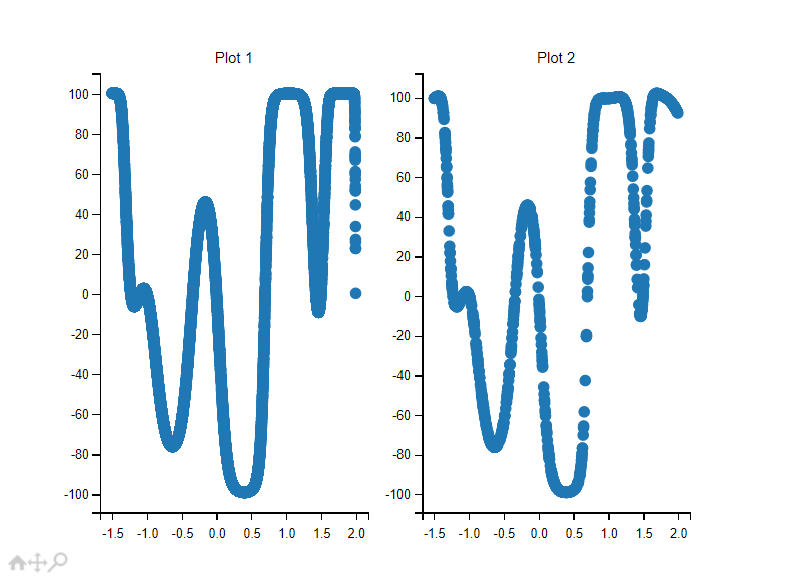

In [ ]:
# nodes_count_list = [25,25]
# learning_rate = 0.01
# epochs = 4000
# batch_size = 2000
# momentum = 0.9

# Epoch 0: MSE = 5170.865083353938
# Epoch 1000: MSE = 111.1784391350552
# Epoch 2000: MSE = 9.142509085017375
# Epoch 3000: MSE = 12.02161969505508
# MSE na testowym: 5.300374414489048

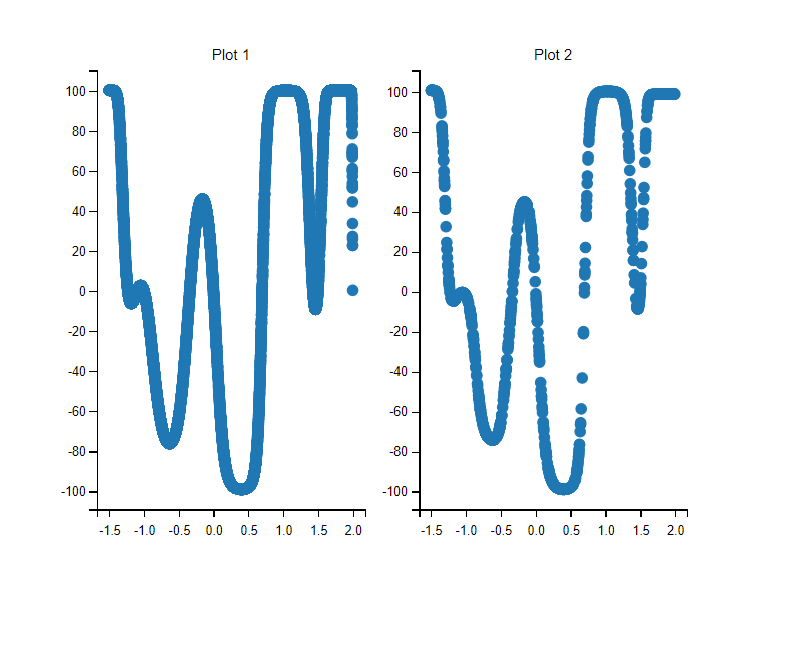

In [ ]:
# nodes_count_list = [20,20,20]
# learning_rate = 0.01
# epochs = 4000
# batch_size = 2000
# momentum = 0.9

# Epoch 0: MSE = 5174.693121024587
# Epoch 1000: MSE = 350.89681487678
# Epoch 2000: MSE = 350.0084126488148
# Epoch 3000: MSE = 350.2519580064886
# MSE na testowym: 394.05480075880627

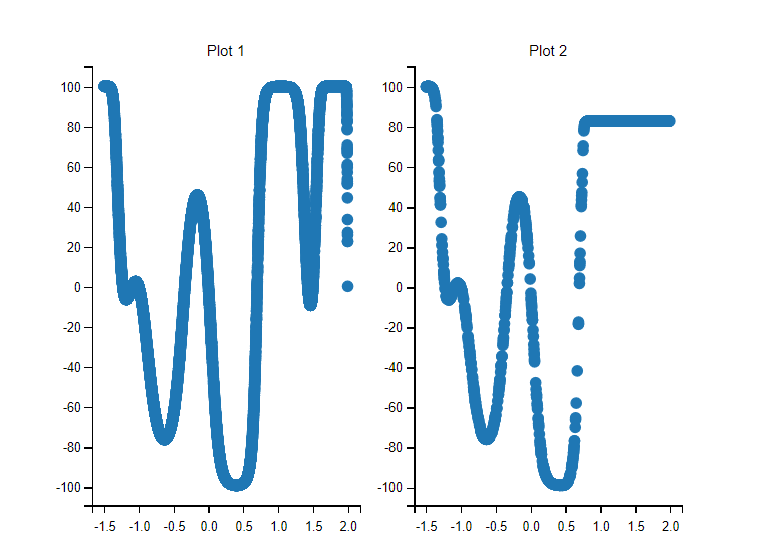

## Tanh

In [ ]:
# nodes_count_list = [50]
# learning_rate = 0.002
# epochs = 4000
# batch_size = 2000
# momentum = 0.9


# Epoch 0: MSE = 5149.638786208092
# Epoch 1000: MSE = 30.76108675719899
# Epoch 2000: MSE = 9.256923272790027
# Epoch 3000: MSE = 6.749976386173964
# MSE na testowym: 4.894655206907242

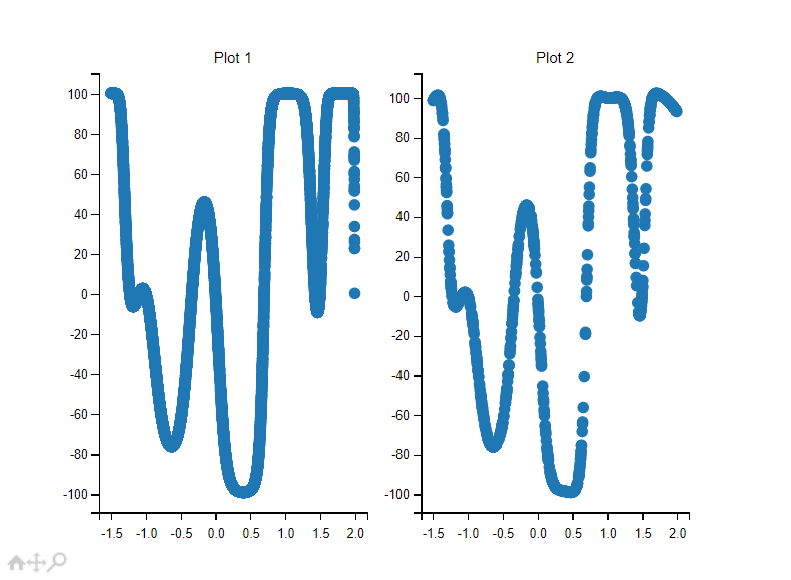

In [ ]:
# nodes_count_list = [25,25]
# learning_rate = 0.002
# epochs = 4000
# batch_size = 2000
# momentum = 0.9

# Epoch 0: MSE = 5136.084552411838
# Epoch 1000: MSE = 10.591343313718895
# Epoch 2000: MSE = 5.3612783539244395
# Epoch 3000: MSE = 6.133491644129625
# MSE na testowym: 4.219282711800606

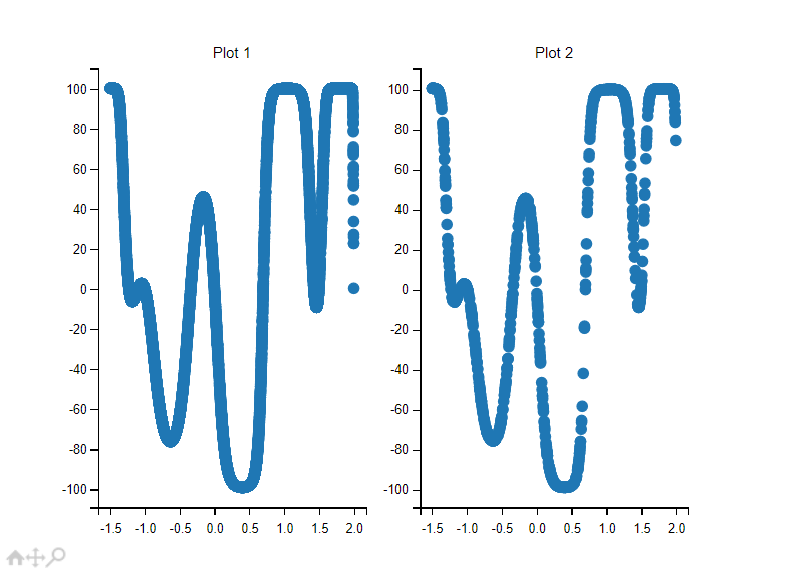

In [ ]:
# nodes_count_list = [15,15,15]
# learning_rate = 0.002
# epochs = 4000
# batch_size = 2000
# momentum = 0.9

# Epoch 0: MSE = 5209.724744672605
# Epoch 1000: MSE = 289.33016083633225
# Epoch 2000: MSE = 288.20163029849533
# Epoch 3000: MSE = 288.45101738039256
# MSE na testowym: 322.2157789749983

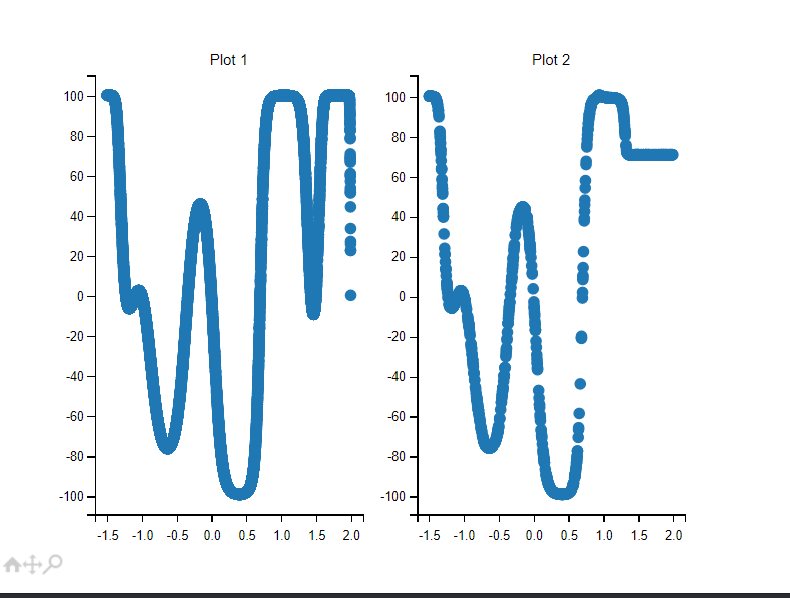

## Linear

In [ ]:
# nodes_count_list = [30]
# learning_rate = 0.002
# epochs = 4000
# batch_size = 2000
# momentum = 0.9

# Epoch 0: MSE = 5048.798017763396
# Epoch 1000: MSE = 4398.257868388361
# Epoch 2000: MSE = 4398.229886259831
# Epoch 3000: MSE = 4398.261782219625
# MSE na testowym: 4434.4493186309655

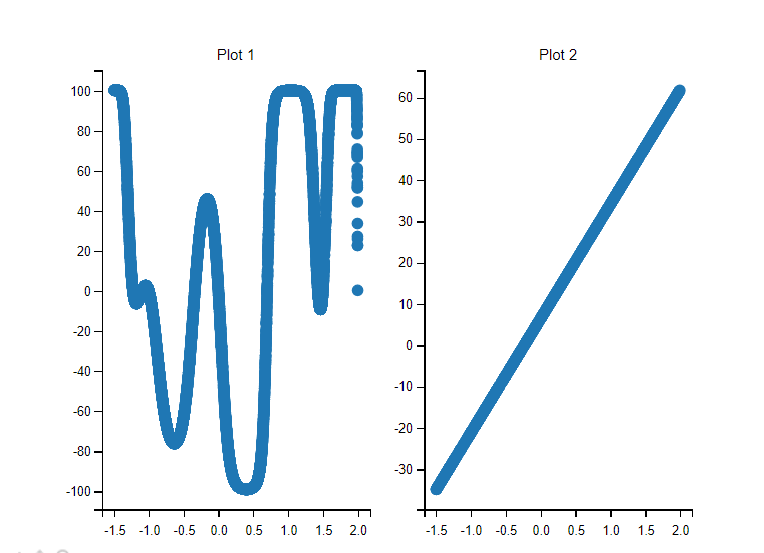

In [ ]:
# nodes_count_list = [30,30]
# learning_rate = 0.002
# epochs = 4000
# batch_size = 2000
# momentum = 0.9

# Epoch 0: MSE = 4591.868065238107
# Epoch 1000: MSE = 4401.928921398793
# Epoch 2000: MSE = 4398.449828743277
# Epoch 3000: MSE = 4399.192498145948
# MSE na testowym: 4434.177493594949

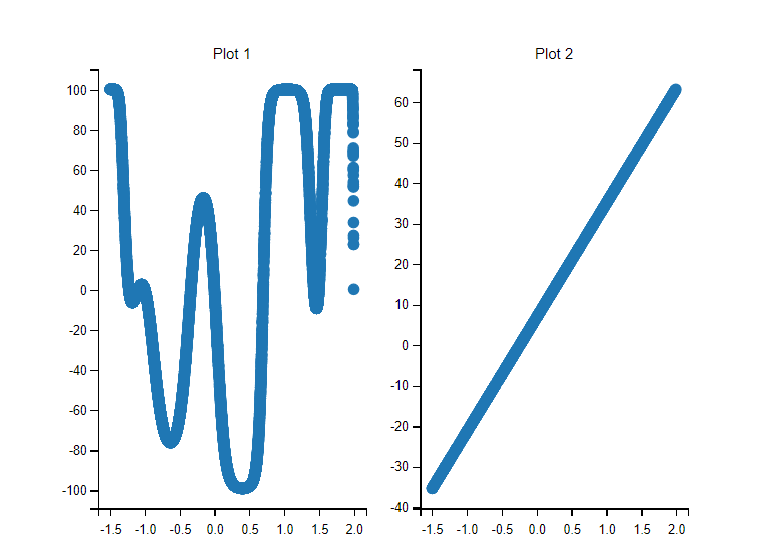

In [ ]:
# nodes_count_list = [10,10,10]
# learning_rate = 0.001
# epochs = 4000
# batch_size = 2000
# momentum = 0.9

# Epoch 0: MSE = 4849.196810397605
# Epoch 1000: MSE = 4398.409502739212
# Epoch 2000: MSE = 4403.692938115735
# Epoch 3000: MSE = 4399.213842830253
# MSE na testowym: 4442.99537500258

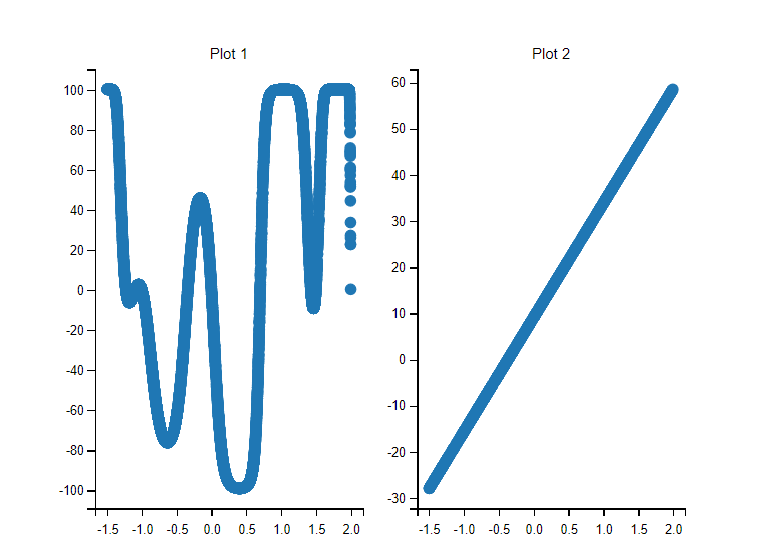

### RELU
Pokazywałem Panu jak wygląda u mnie funkcja Relu na zajęciach laboratyjnych. Nie mogliśmy znaleźć błędu w kodzie. Moje Relu daje wyniki takie jak na wykresie poniżej. Żadna zmiana architektury czy sposobu inicjalizacji wag nie pomaga. Nie wiem, z czego wynika ten błąd. Na początku raportu jest definicja funkcji Relu i jej pochodnej.

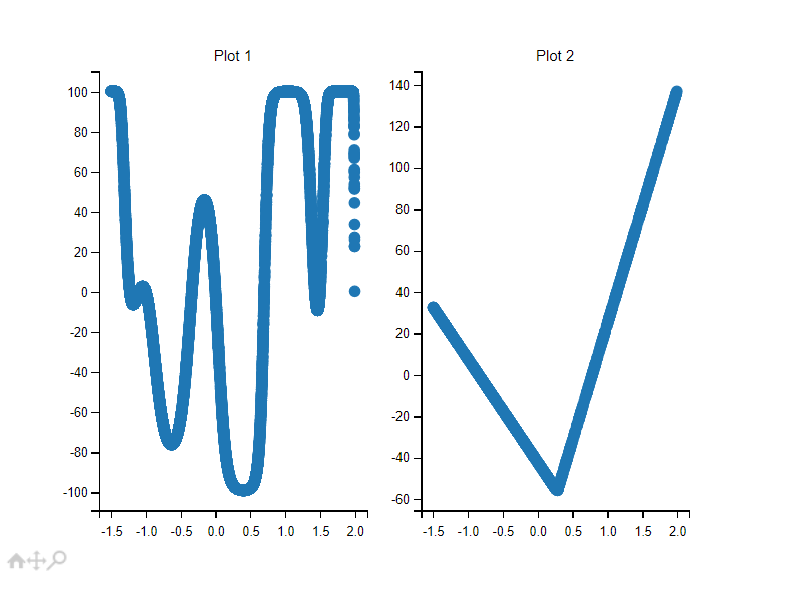



## Testowanie najlepszego zestawu na steps-large

In [ ]:
# Tanh
# nodes_count_list = [25,25]
# learning_rate = 0.002
# epochs = 4000
# batch_size = 2000
# momentum = 0.9

# Epoch 0: MSE = 5821.046109578541
# Epoch 1000: MSE = 27.53699752323331
# Epoch 2000: MSE = 58.9539346870646
# Epoch 3000: MSE = 18.733445988610413
# MSE na testowym: 11.205665032079848

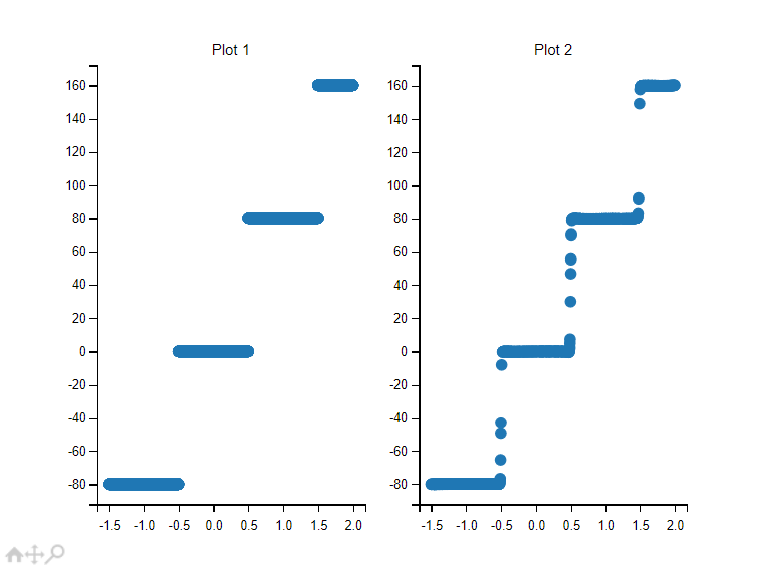